In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample=pd.read_csv("../input/sample_submission.csv")

In [3]:
sample.shape

(9463187, 5)

In [4]:
parcelids=sample['ParcelId'].values
len(parcelids)

9463187

In [5]:
df=dd.read_parquet('../input/scratch/tax_history_2007to2017_v2.parq') 

In [6]:
def f(subdf):
    subdf=subdf.set_index('parcelid')
    return (subdf,)

In [7]:
%time list_df=df.groupby('assessmentyear').apply(lambda u: f(u)).compute()

/home/lizhen09/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  """Entry point for launching an IPython kernel.


CPU times: user 2min 39s, sys: 1min 8s, total: 3min 47s
Wall time: 1min 5s


In [12]:
list_df.shape

(11,)

In [13]:
tmp=list_df

In [17]:
tmp.iloc[0][0].iloc[0,0]

2007

In [18]:
lst_df={u[0].iloc[0,0]:u[0] for u in tmp}

In [19]:
lst_df.keys()

[2016, 2017, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [26]:
def get_col(col):
    cols=sorted(lst_df.keys())
    subdf=pd.concat([lst_df[k][col] for k in cols],axis=1)
    subdf.columns=cols
    subdf=subdf.reindex(parcelids,copy=False)
    return subdf 

In [27]:
subdf=get_col('totalassessedvalue')

In [30]:
subdf.shape

(9463187, 11)

In [31]:
subdf.head()

2007     2008     2009      2010      2011      2012      2013  \
parcelid                                                                      
8921582       NaN      NaN      NaN  164876.0  166118.0  169439.0  172827.0   
8921682       NaN      NaN      NaN  360000.0  360000.0  360000.0  360000.0   
8921802       NaN      NaN      NaN  221667.0  210000.0  252500.0  257550.0   
8921972   66794.0  68130.0  69492.0   69327.0   69849.0   71245.0   72671.0   
8922549       NaN      NaN      NaN  157715.0  158903.0  162080.0  165322.0   

              2014      2015      2016      2017  
parcelid                                          
8921582   173611.0  177079.0  179778.0  183373.0  
8921682   600000.0  659477.0  669528.0  682914.0  
8921802   258718.0  263887.0  267909.0  273267.0  
8921972    73001.0   74459.0   75594.0   77106.0  
8922549   166072.0  169389.0  171972.0  175411.0

In [35]:
a=(~subdf.isnull()).sum(1)

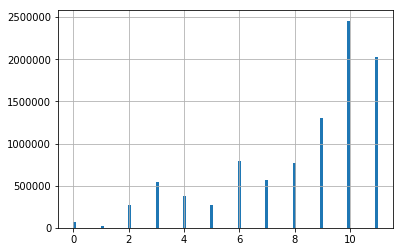

In [36]:
a.hist(bins=100)